In [2]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import util_inaccuracy

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_to_test = df.copy()

adding 10% of inaccuracies in avg_glucose_level values

ADDING 10% TO FEATURE: avg_glucose_level
--------------------------------------
Modifying 936 rows in column 'avg_glucose_level'
Rows to modify: [6198, 4769, 3715, 4502, 3917, 6855, 4110, 7105, 6487, 5476, 4970, 4056, 2947, 2696, 5505, 7709, 1582, 7186, 8096, 5148, 6660, 465, 736, 6808, 2676, 6548, 2752, 4137, 1155, 3620, 4050, 2276, 3492, 4691, 5927, 3489, 4592, 3163, 6841, 7954, 6210, 1092, 2766, 5769, 1692, 6211, 8008, 6979, 9362, 6076, 4731, 1559, 834, 3756, 7430, 4067, 3839, 4631, 3589, 397, 6469, 8165, 5715, 9208, 7667, 8060, 2525, 8584, 7427, 765, 5956, 8780, 3449, 5687, 3159, 3418, 6836, 85, 5625, 1681, 8935, 5941, 947, 1170, 4335, 1041, 2598, 7957, 8395, 2857, 7180, 2400, 6891, 7465, 6518, 6254, 4703, 8882, 6775, 194, 6950, 6246, 1901, 2245, 4344, 3284, 8884, 3801, 3660, 4589, 987, 918, 4529, 322, 9084, 8803, 3409, 4289, 1747, 4626, 3495, 8952, 2368, 8061, 1904, 2013, 7252, 8181, 1332, 4969, 703, 474, 8770, 2256, 452, 2014, 392, 2073, 7240, 2734, 4836, 8145, 6436, 5229, 8595, 

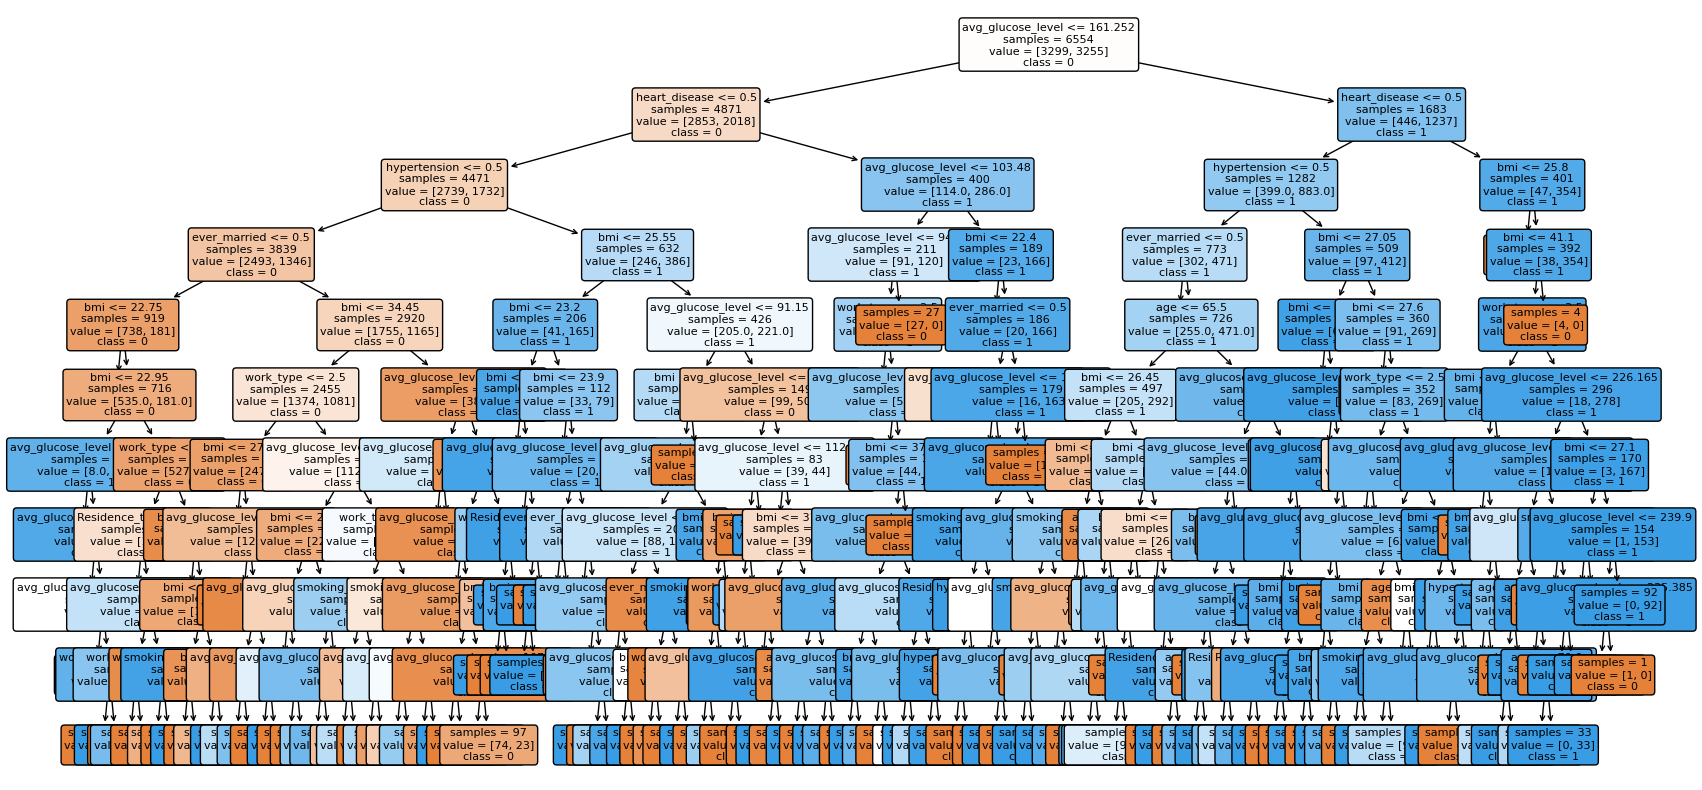

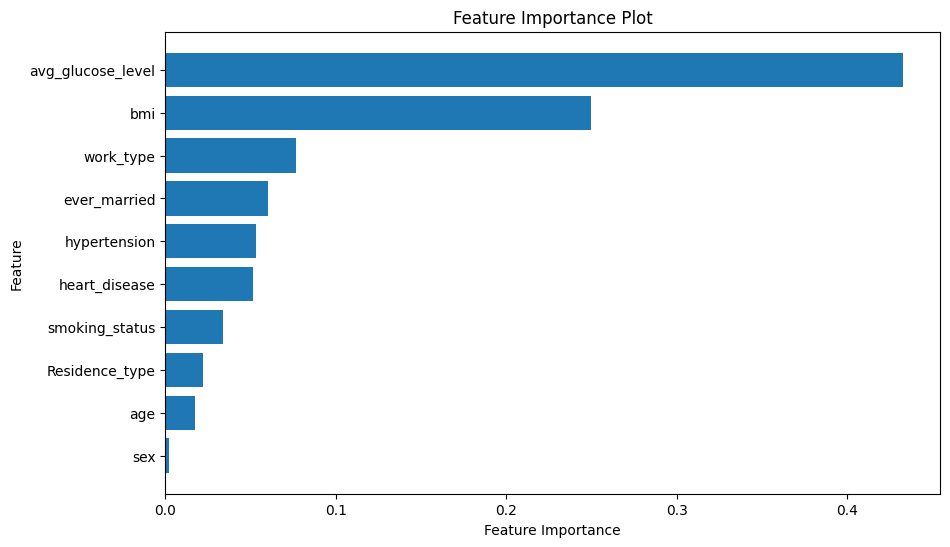

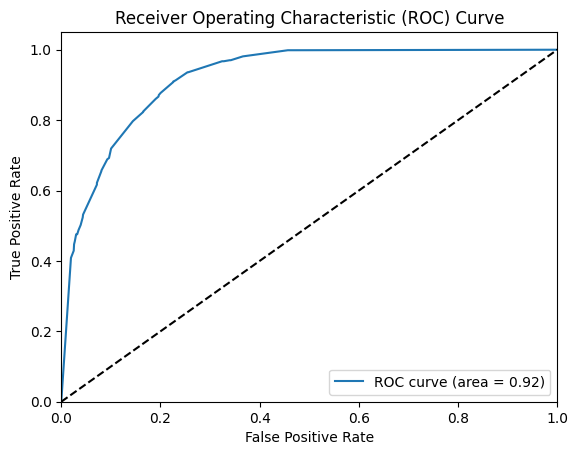

AUC Score: 0.9195187016609612


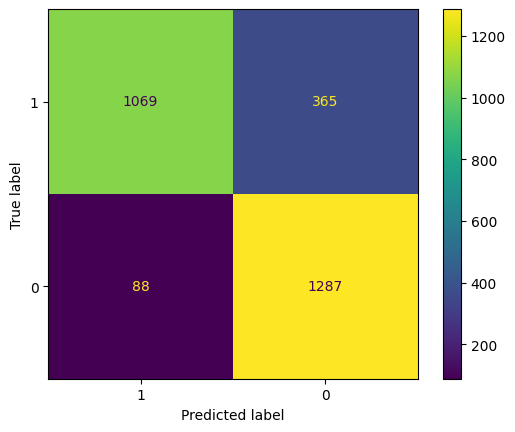

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8113879003558719, 0.8149466192170819, 0.8540925266903915, 0.7758007117437722, 0.8540925266903915, 0.7935943060498221, 0.8291814946619217, 0.8149466192170819, 0.8042704626334519, 0.7821428571428571]
Mean accuracy: 0.8134456024402643
95% confidence interval: (0.7943159008025971, 0.8325753040779316)


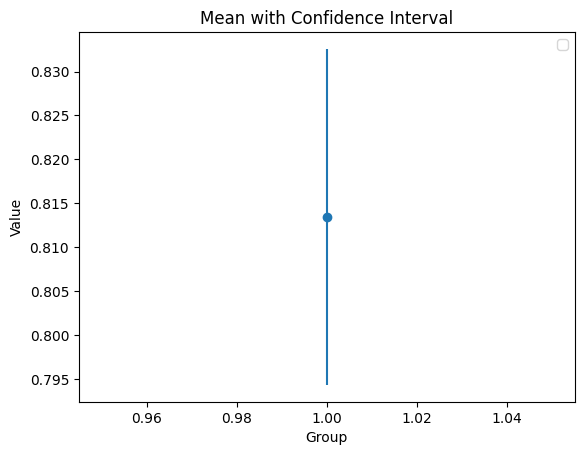


SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1434
           1       0.79      0.87      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.83      0.82      0.82      2809
weighted avg       0.83      0.82      0.82      2809



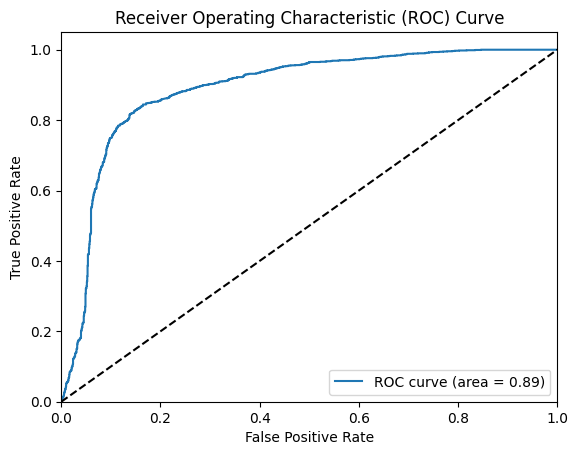

AUC Score: 0.8876624825662482


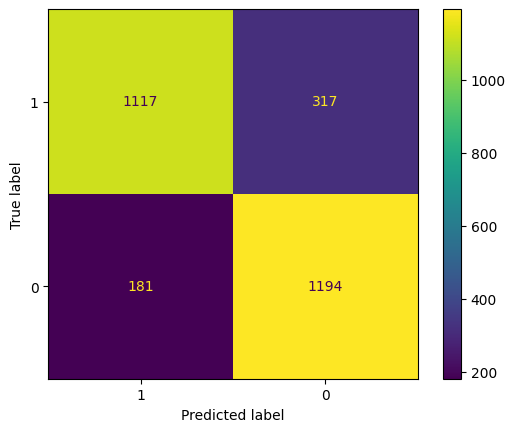

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.7758007117437722, 0.797153024911032, 0.7722419928825622, 0.7864768683274022, 0.7829181494661922, 0.7686832740213523, 0.7793594306049823, 0.7722419928825622, 0.7392857142857143]
Mean accuracy: 0.7774872902897814
95% confidence interval: (0.7652477634412136, 0.7897268171383491)


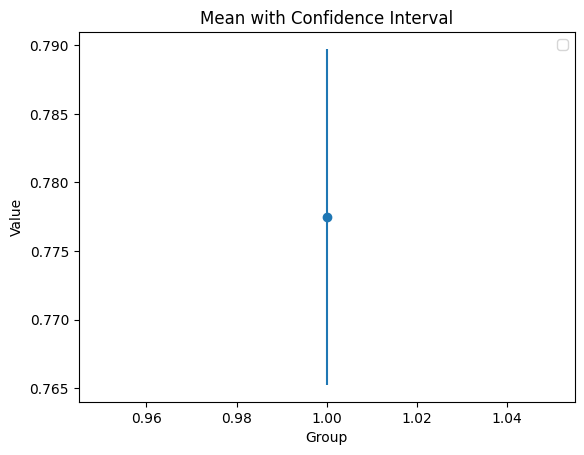

In [3]:

print('ADDING 10% TO FEATURE: avg_glucose_level')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level', df, 10)

print('\nDECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_to_test)

print('\nSVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_to_test)


adding 10% of inaccuracies in bmi

ADDING 10% TO FEATURE: bmi
--------------------------------------
Modifying 936 rows in column 'bmi'
Rows to modify: [3544, 38, 1405, 6281, 8608, 431, 2711, 880, 2990, 7023, 682, 4254, 748, 8888, 7812, 5564, 65, 824, 4368, 5473, 2686, 4102, 8402, 7832, 1314, 2975, 4383, 1842, 8657, 5030, 7873, 7555, 4802, 4548, 1858, 5974, 8435, 8270, 514, 225, 5156, 5992, 9036, 8069, 1194, 7479, 7767, 5367, 2436, 2844, 6367, 4630, 6391, 7762, 6311, 1538, 5893, 6524, 187, 6156, 1444, 462, 666, 2275, 4115, 7335, 194, 5880, 8635, 4189, 1889, 7892, 9270, 8941, 6675, 383, 8365, 3727, 5989, 958, 537, 7285, 6952, 8818, 4801, 3867, 4754, 2624, 4844, 4186, 7683, 7397, 8236, 1800, 1560, 2293, 8510, 6650, 6963, 6743, 8075, 2796, 7864, 3293, 8567, 7731, 1798, 4999, 2115, 4307, 5081, 107, 7360, 1782, 1501, 5546, 7443, 6956, 6379, 4190, 5300, 1999, 965, 6375, 230, 5645, 2006, 5329, 3690, 6810, 5939, 2527, 6490, 3242, 459, 8093, 5381, 3474, 1390, 2794, 957, 3845, 2483, 7391, 5310, 6112, 4612, 4977, 8520, 2486, 4426,

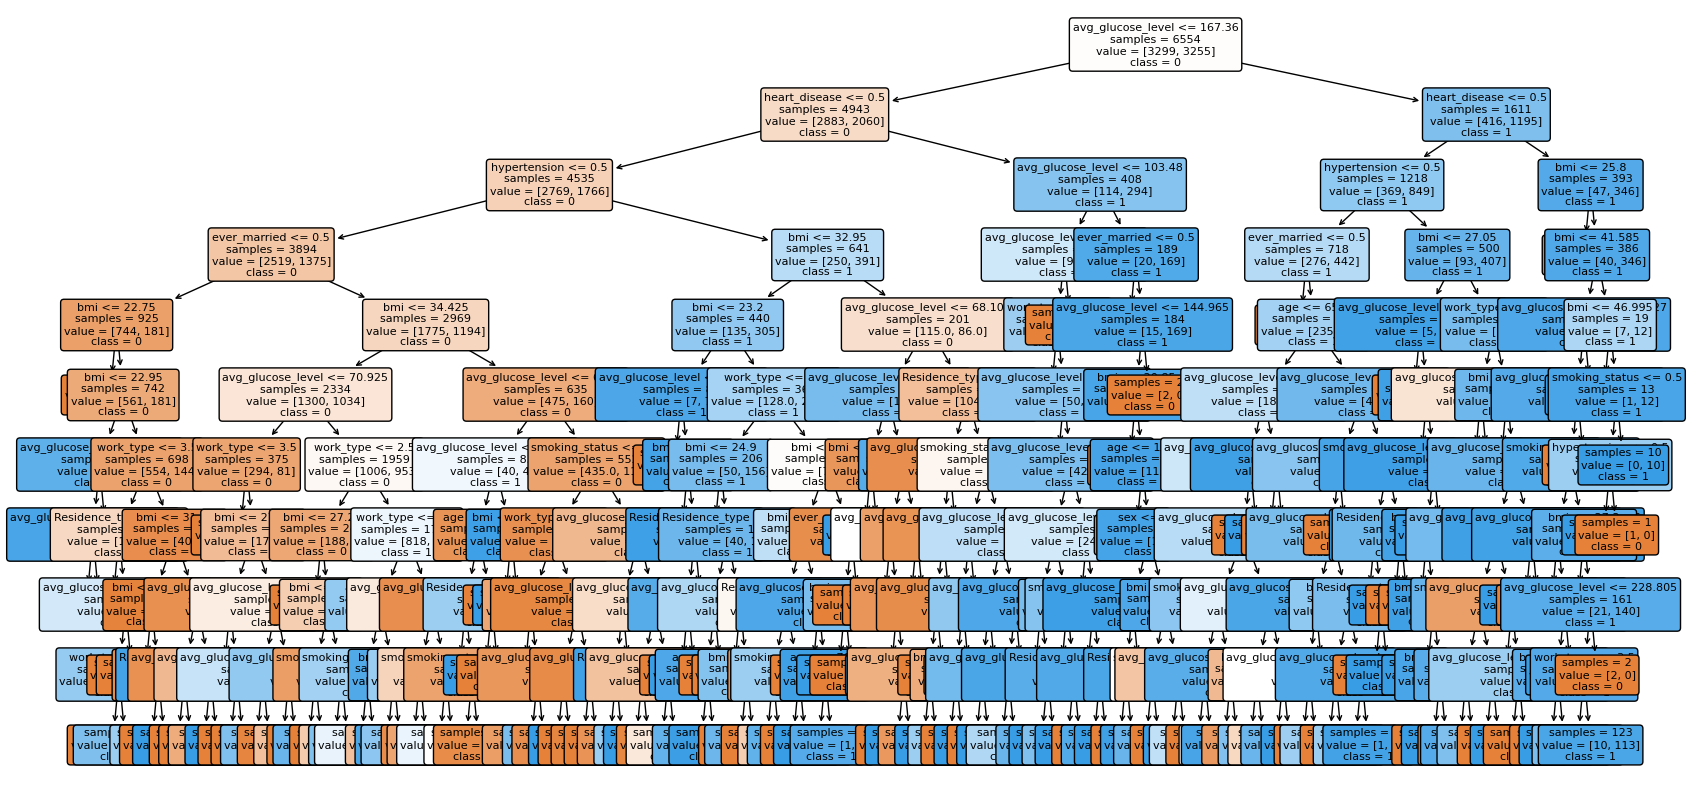

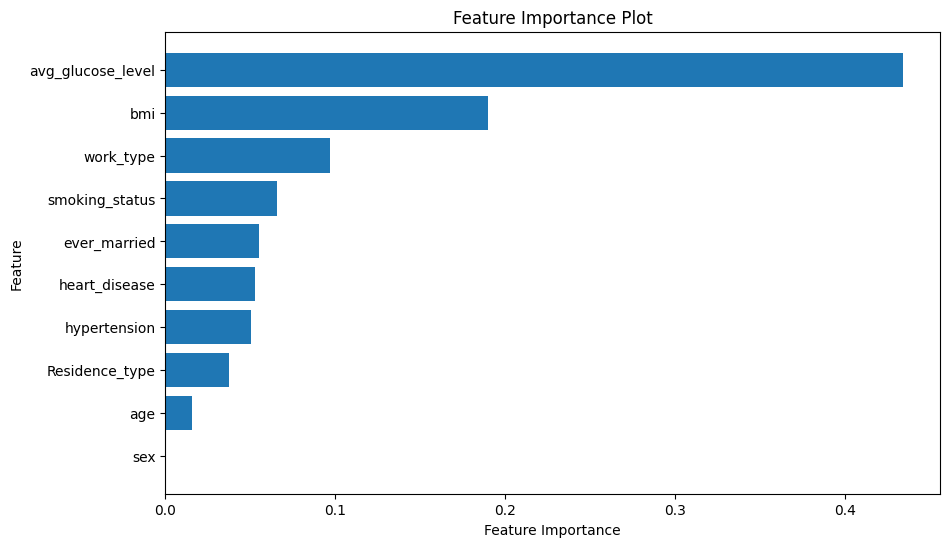

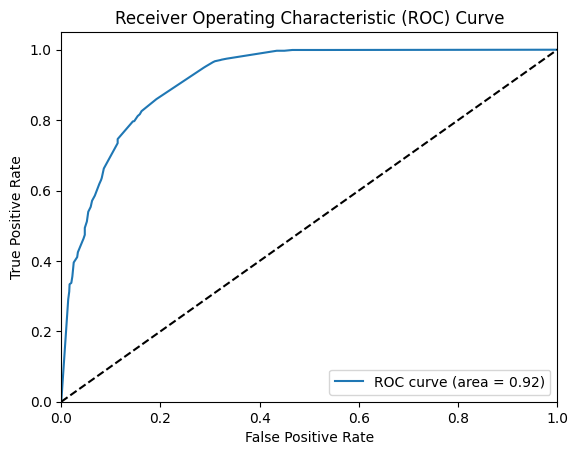

AUC Score: 0.9160129326740206


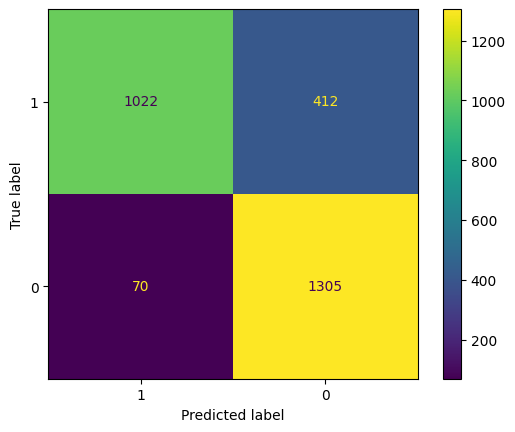

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.8291814946619217, 0.8291814946619217, 0.8327402135231317, 0.8647686832740213, 0.8540925266903915, 0.8398576512455516, 0.800711743772242, 0.7651245551601423, 0.8428571428571429]
Mean accuracy: 0.8259227249618709
95% confidence interval: (0.8048377902718307, 0.8470076596519112)


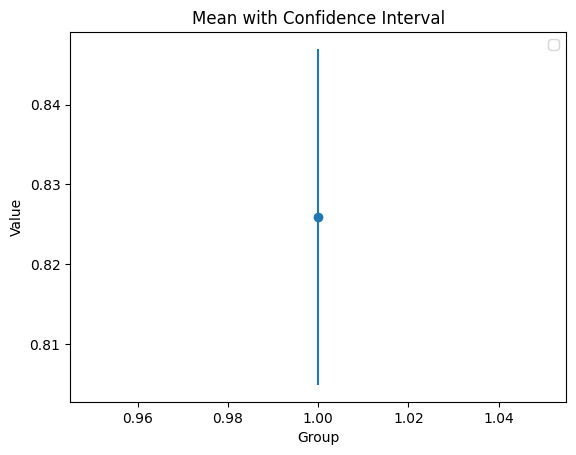


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1434
           1       0.78      0.87      0.82      1375

    accuracy                           0.81      2809
   macro avg       0.82      0.82      0.81      2809
weighted avg       0.82      0.81      0.81      2809



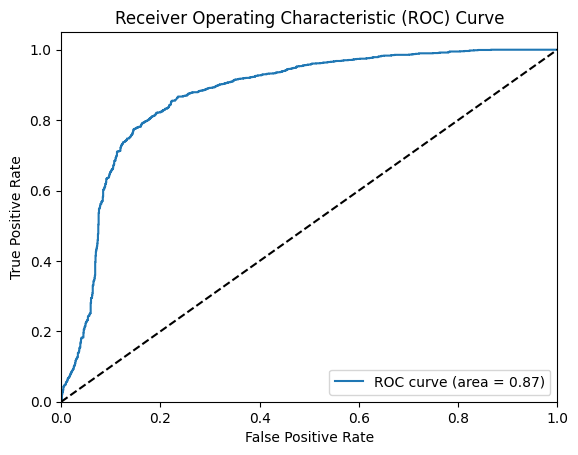

AUC Score: 0.8703927982756434


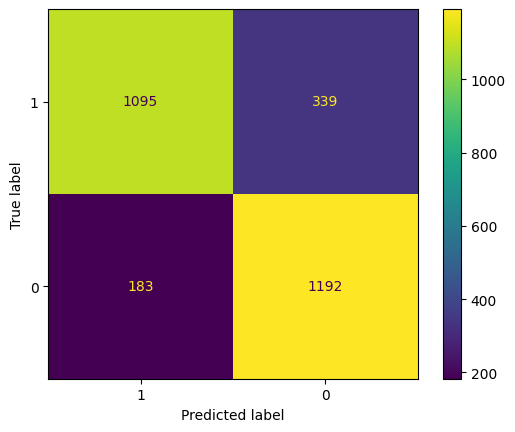

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7651245551601423, 0.7508896797153025, 0.7615658362989324, 0.7402135231316725, 0.7686832740213523, 0.8078291814946619, 0.7580071174377224, 0.7651245551601423, 0.7758007117437722, 0.8]
Mean accuracy: 0.7693238434163701
95% confidence interval: (0.7544768603082701, 0.78417082652447)


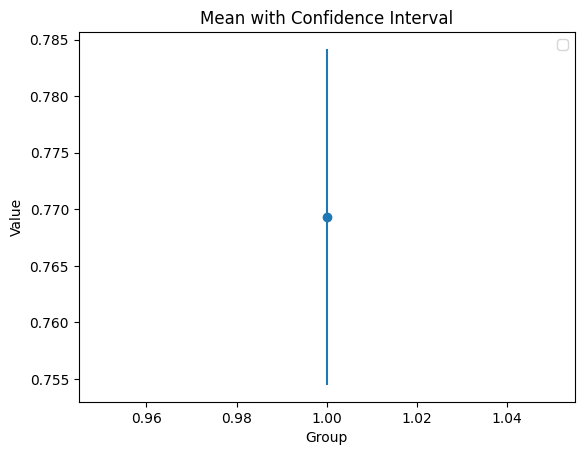

In [4]:
print('ADDING 10% TO FEATURE: bmi')
print('--------------------------------------')
df_modified= util_inaccuracy.modify_values('bmi',df, 10)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)

inaccuracies on bmi and avg_glucose_level features

ADDING 10% TO FEATURE: avg_glucose_level & bmi
--------------------------------------
Modifying 936 rows in column 'avg_glucose_level'
Rows to modify: [7218, 8324, 1269, 3434, 4422, 1744, 433, 7169, 387, 7593, 2669, 4871, 1256, 3913, 195, 6312, 7916, 6793, 4037, 1077, 5255, 7240, 7195, 5434, 7427, 2367, 8403, 9150, 8505, 9312, 8792, 8047, 5963, 8712, 5159, 2766, 8132, 1636, 3613, 2892, 3020, 2986, 4609, 548, 8245, 7069, 2845, 349, 6675, 6099, 4345, 4063, 55, 2936, 1671, 7235, 2122, 5872, 3541, 8664, 3542, 1658, 6744, 3979, 5801, 9293, 5350, 9166, 4424, 3082, 3161, 328, 3337, 6955, 9006, 6520, 1064, 7464, 6509, 3423, 158, 4213, 2071, 6259, 786, 1941, 2781, 2677, 7685, 3130, 3624, 8293, 2815, 4698, 5860, 1217, 8263, 9067, 7518, 1646, 4524, 6498, 2365, 3991, 2616, 3741, 3459, 7103, 3650, 1943, 5158, 7572, 5129, 9359, 612, 5825, 6995, 389, 8511, 5953, 8947, 3527, 3539, 1432, 9337, 1500, 6757, 9249, 8560, 3593, 4797, 1157, 8073, 1225, 8121, 3886, 4153, 6597, 4779, 8614, 5740, 6754, 1842, 27

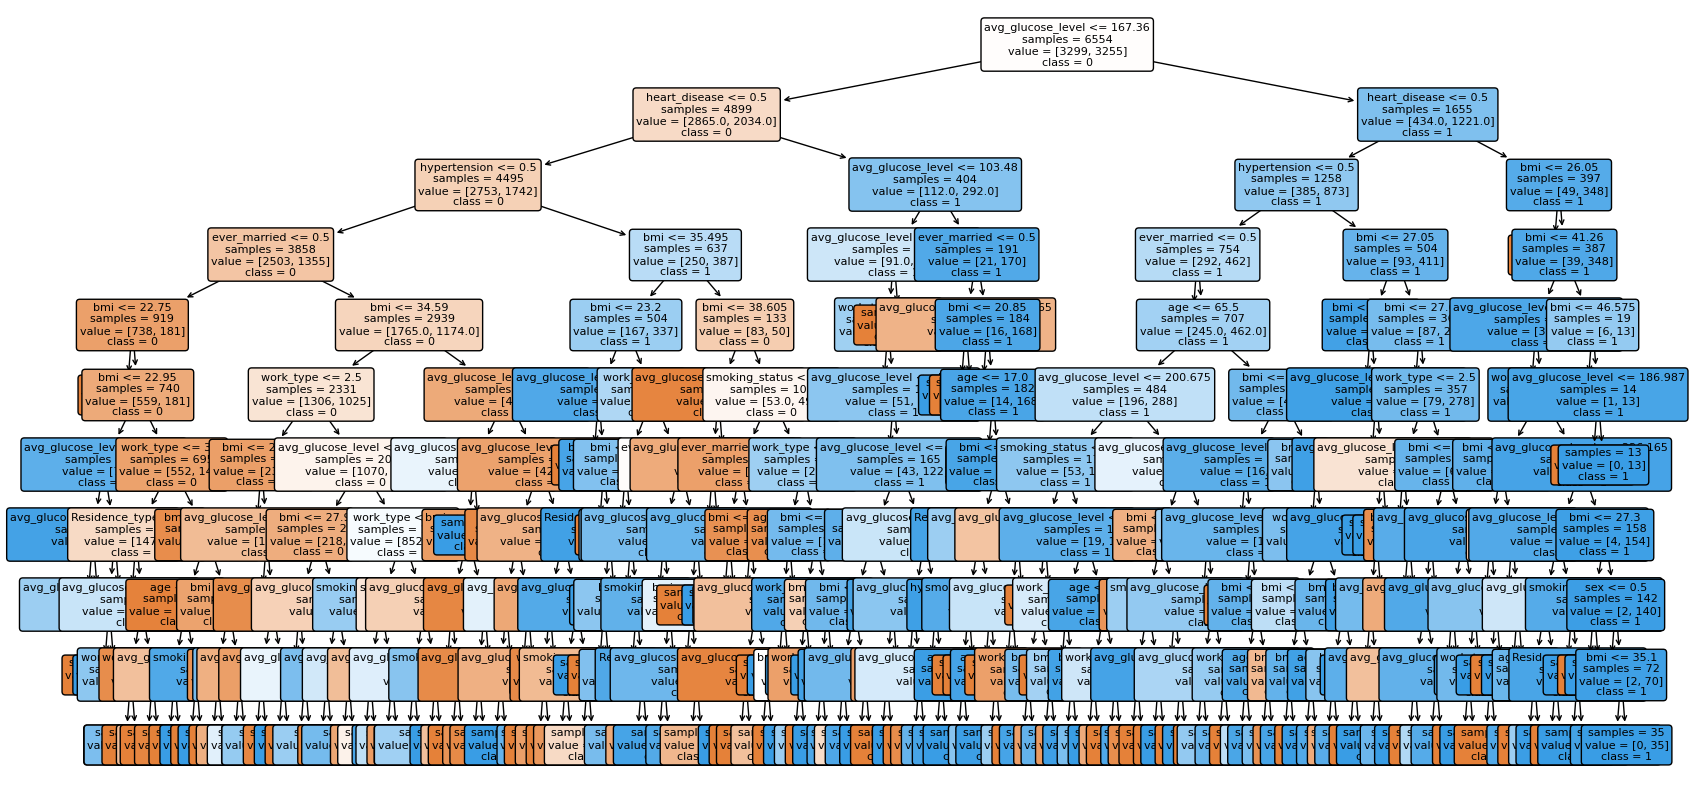

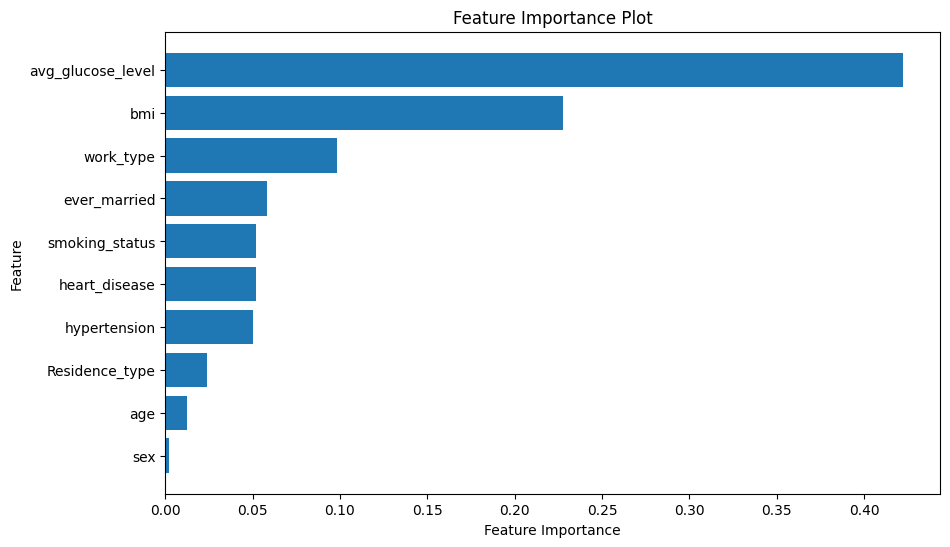

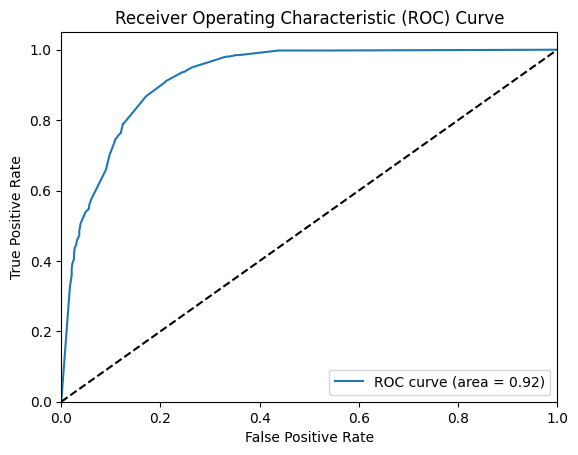

AUC Score: 0.9221932293647775


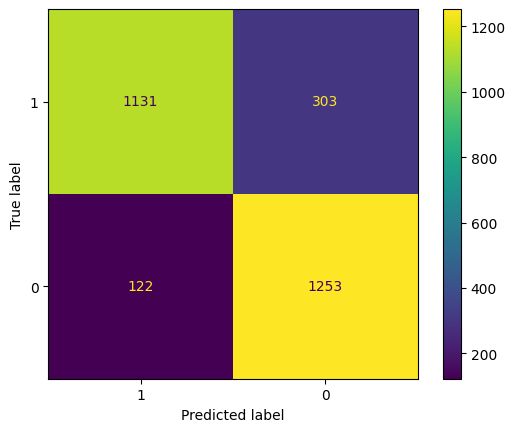

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8398576512455516, 0.8718861209964412, 0.8327402135231317, 0.8291814946619217, 0.8398576512455516, 0.8291814946619217, 0.8362989323843416, 0.7864768683274022, 0.8398576512455516, 0.8571428571428571]
Mean accuracy: 0.8362480935434673
95% confidence interval: (0.8205480362099349, 0.8519481508769997)


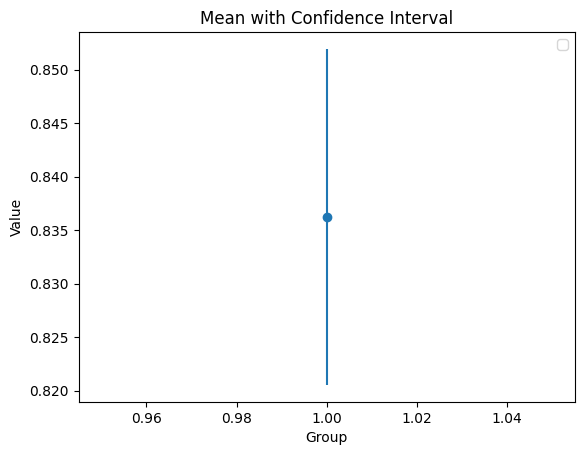


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1434
           1       0.76      0.86      0.81      1375

    accuracy                           0.80      2809
   macro avg       0.81      0.80      0.80      2809
weighted avg       0.81      0.80      0.80      2809



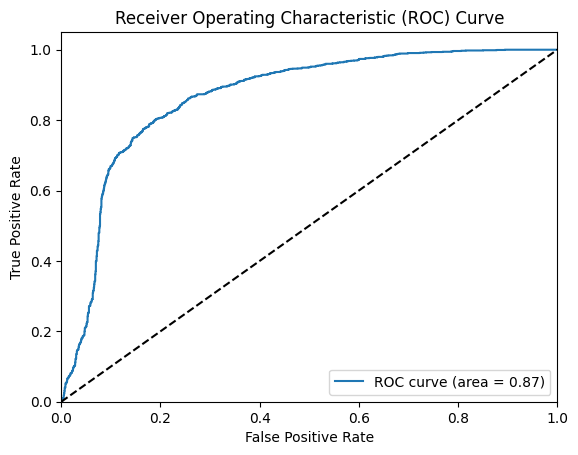

AUC Score: 0.8656046659059212


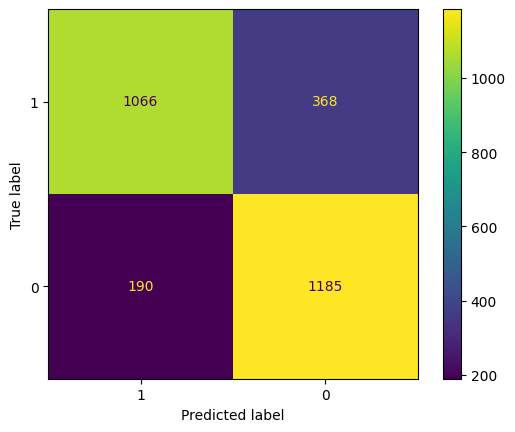

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7686832740213523, 0.7580071174377224, 0.7758007117437722, 0.800711743772242, 0.7615658362989324, 0.8042704626334519, 0.7793594306049823, 0.797153024911032, 0.7580071174377224, 0.7642857142857142]
Mean accuracy: 0.7767844433146924
95% confidence interval: (0.7639232548036914, 0.7896456318256935)


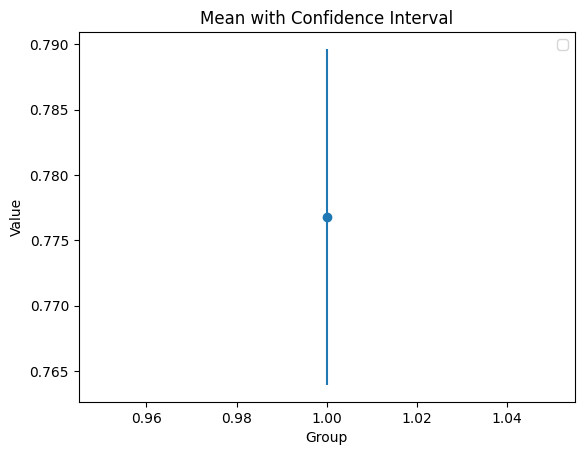

In [5]:
print('ADDING 10% TO FEATURE: avg_glucose_level & bmi')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 10)
df_modified = util_inaccuracy.modify_values('bmi',df_modified, 10)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm_bmi_glucose, confidence_interval_svm_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

adding inaccuracies to non binary features

ADDING 10% TO MODIFIABLE FEATURES
--------------------------------------
Modifying 936 rows in column 'avg_glucose_level'
Rows to modify: [8648, 7893, 9215, 1563, 2095, 5331, 1323, 3781, 7643, 2378, 2606, 1881, 1457, 8263, 4375, 5558, 5826, 8996, 5786, 7561, 4501, 7540, 1878, 5671, 8964, 5067, 1419, 612, 9262, 3339, 7916, 6927, 3431, 4682, 661, 7095, 1995, 3617, 3614, 8127, 4063, 6552, 4072, 3237, 39, 6386, 9018, 7878, 1004, 1768, 8981, 829, 8935, 3698, 582, 5659, 5386, 4322, 8959, 197, 3081, 1592, 1857, 584, 893, 3928, 943, 4191, 5569, 5020, 1933, 6832, 1032, 9010, 3183, 1485, 7867, 2677, 4149, 2196, 1088, 1462, 7328, 2058, 6272, 2758, 4270, 6022, 8116, 6425, 4884, 2506, 2228, 358, 2841, 5819, 354, 424, 2711, 9274, 3028, 7892, 9026, 3610, 4158, 7271, 9167, 4588, 2000, 9076, 2428, 3080, 7195, 2178, 8022, 761, 2801, 4535, 8009, 221, 7858, 1957, 1156, 964, 6851, 2298, 954, 141, 3346, 5010, 2297, 4625, 3301, 2925, 4657, 486, 5662, 5576, 4098, 4946, 9063, 5039, 7304, 6048, 95, 9073, 2166, 

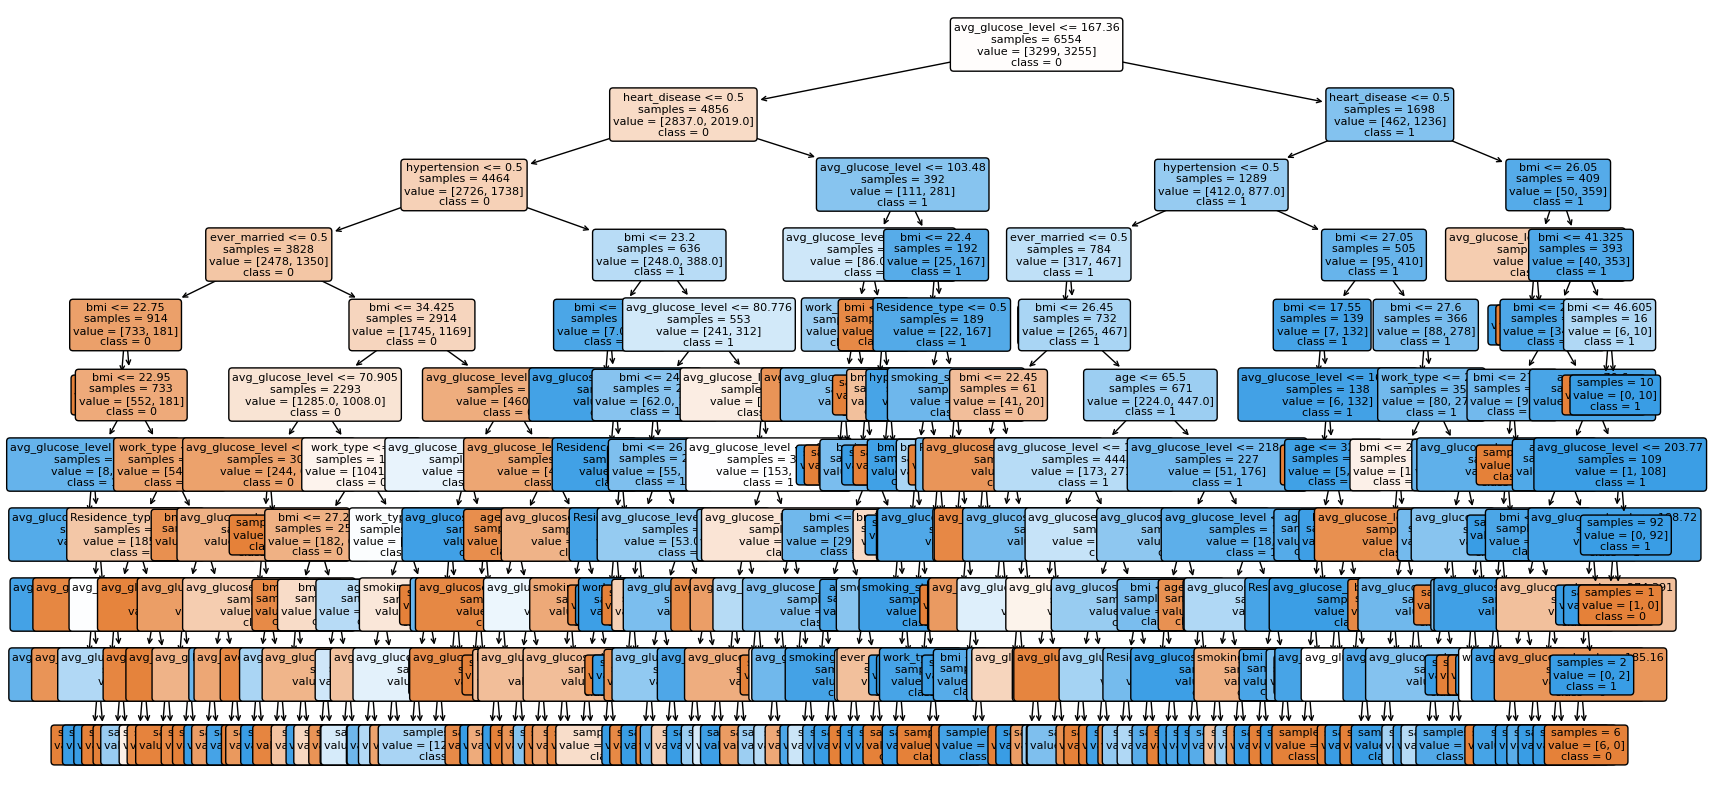

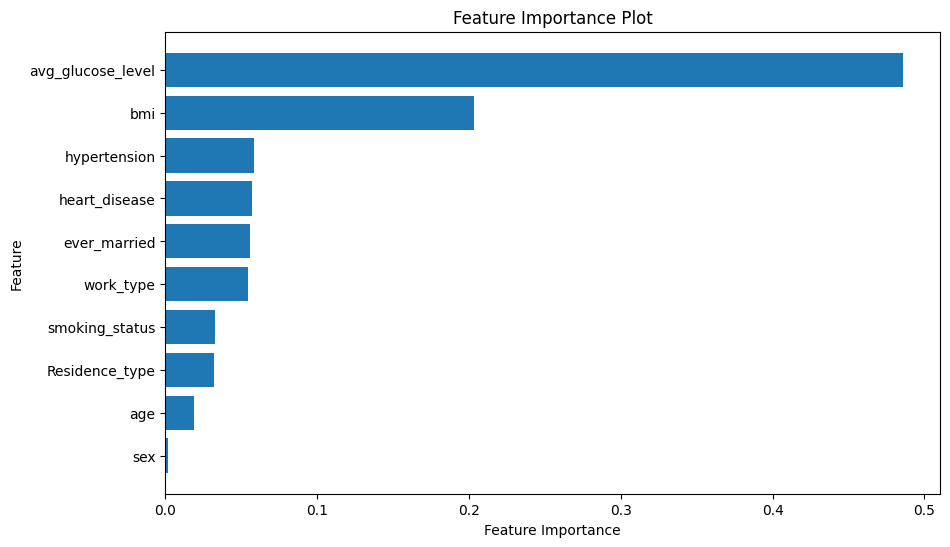

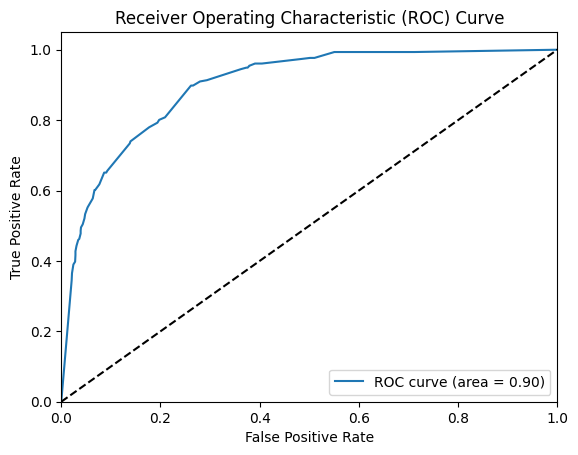

AUC Score: 0.8968639533409406


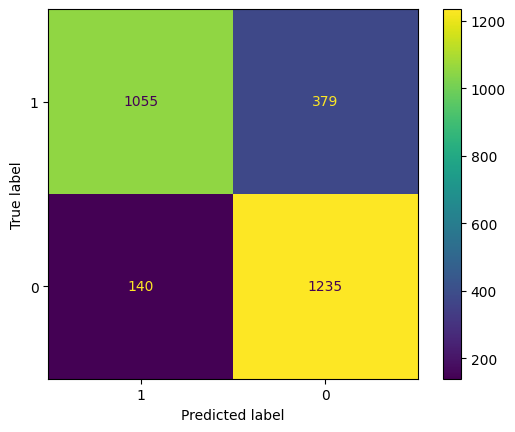

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8683274021352313, 0.797153024911032, 0.7580071174377224, 0.8434163701067615, 0.8469750889679716, 0.8113879003558719, 0.8505338078291815, 0.8505338078291815, 0.8362989323843416, 0.8107142857142857]
Mean accuracy: 0.827334773767158
95% confidence interval: (0.8038144944319731, 0.850855053102343)


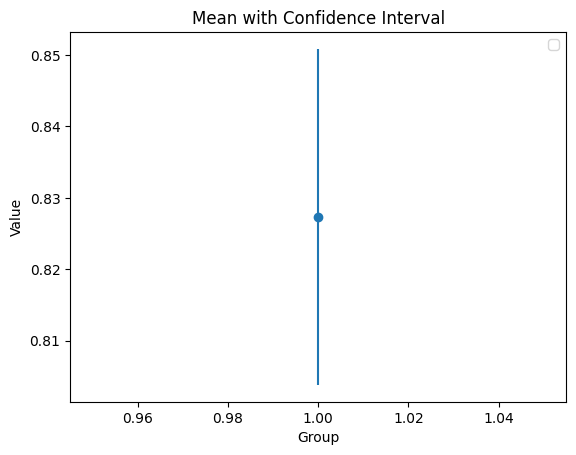


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1434
           1       0.75      0.79      0.77      1375

    accuracy                           0.77      2809
   macro avg       0.77      0.77      0.77      2809
weighted avg       0.77      0.77      0.77      2809



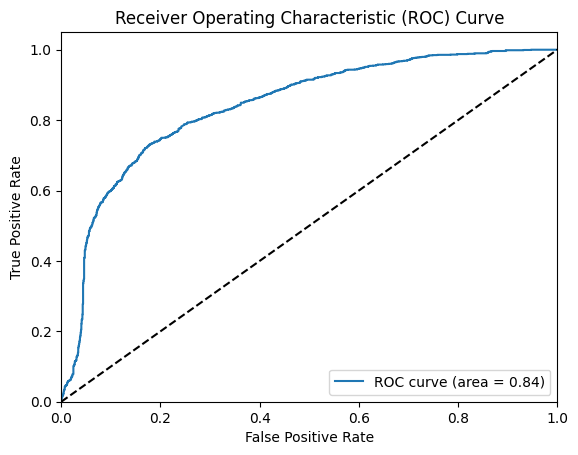

AUC Score: 0.8395628249017371


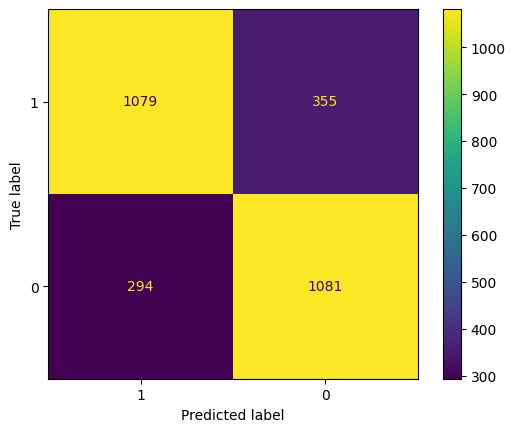

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7544483985765125, 0.8149466192170819, 0.7686832740213523, 0.7437722419928826, 0.797153024911032, 0.7651245551601423, 0.7686832740213523, 0.7402135231316725, 0.7900355871886121, 0.7464285714285714]
Mean accuracy: 0.7689489069649212
95% confidence interval: (0.7511883019591724, 0.7867095119706701)


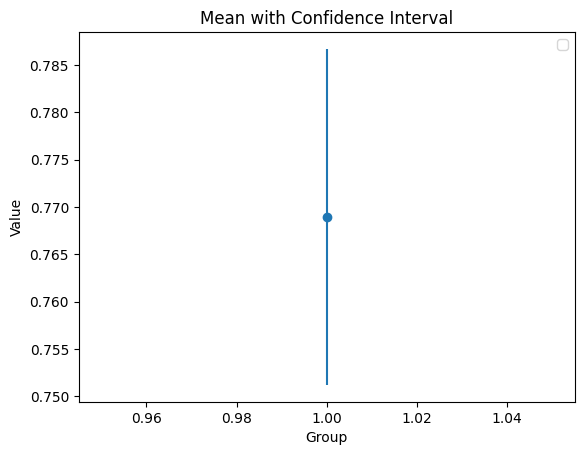

In [6]:
print('ADDING 10% TO MODIFIABLE FEATURES')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 10)
for column in ['work_type','age','bmi', 'avg_glucose_level']:
    df_modified = util_inaccuracy.modify_values(column,df_modified, 10)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_dt, y_test_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt, confidence_interval_dt = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_svm, y_test_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm, confidence_interval_svm = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)

## Conclusion

### ROC CURVE - Decision Tree

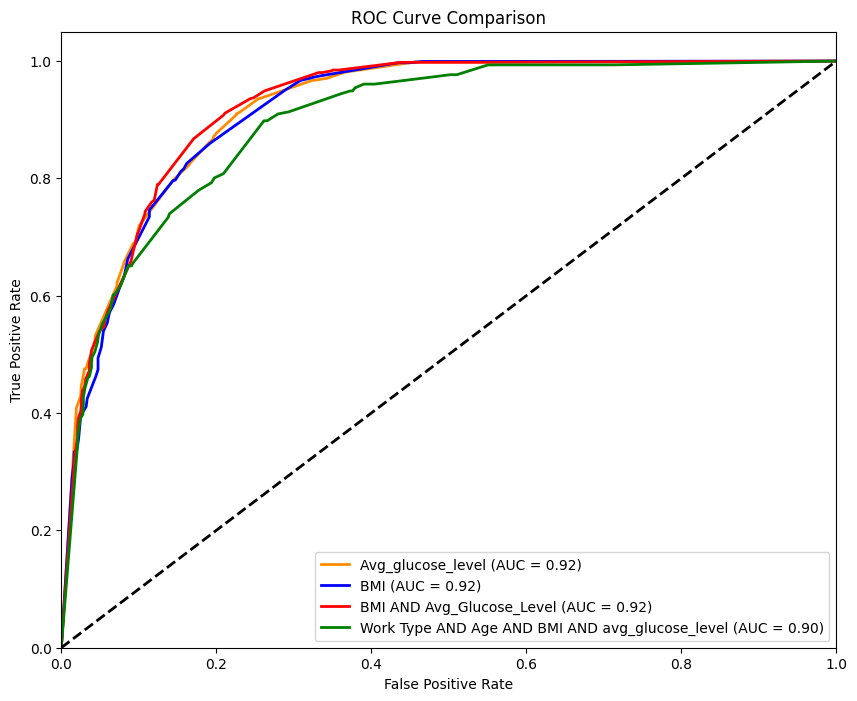

In [7]:
roc_results = [
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, 'BMI AND Avg_Glucose_Level'),
    (y_pred_prob_dt, y_test_dt, 'Work Type AND Age AND BMI AND avg_glucose_level')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### ROC CURVE - Support Vector Machine

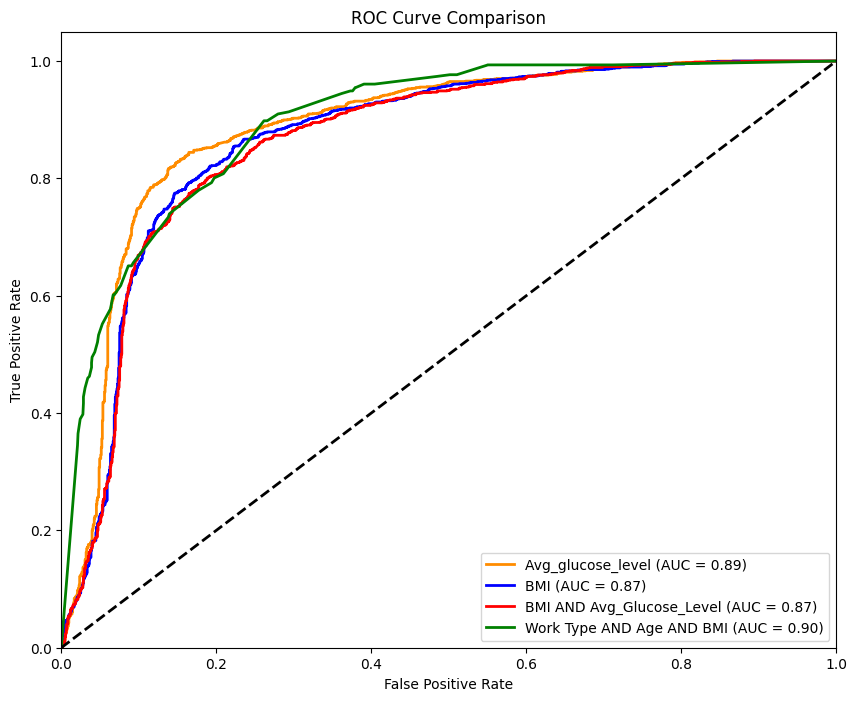

In [8]:
roc_results = [
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, 'BMI AND Avg_Glucose_Level'),
    (y_pred_prob_dt, y_test_svm, 'Work Type AND Age AND BMI')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval - Decision Tree

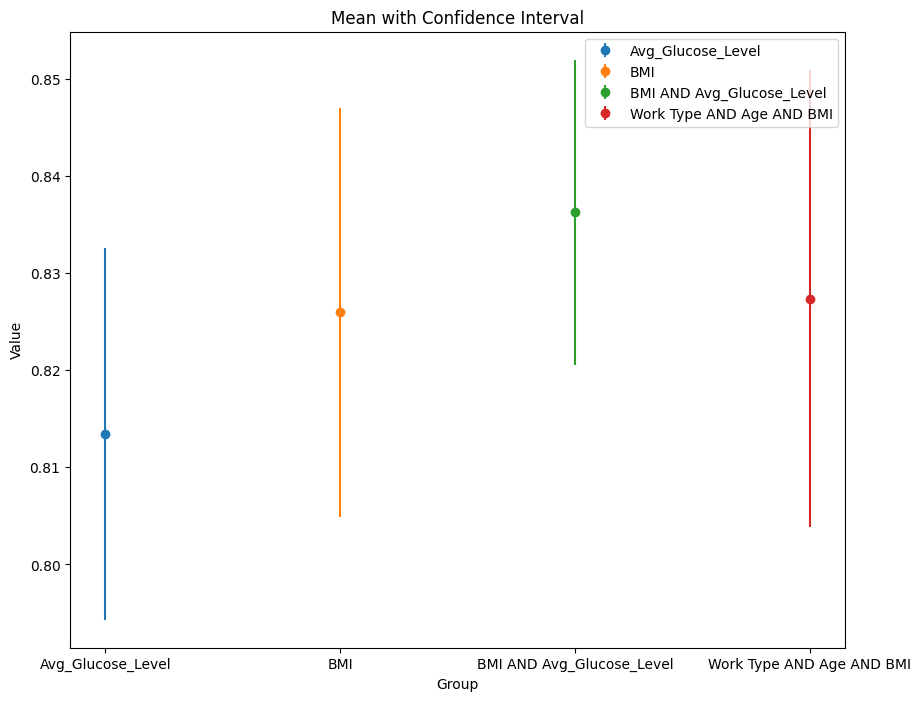

In [9]:
model_results = [
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('BMI AND Avg_Glucose_Level', mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose),
    ('Work Type AND Age AND BMI', mean_accuracy_dt, confidence_interval_dt)
]
ML_algorithms.plot_confidence_intervals(model_results)